# Dunkin Donuts in New England

Let's take a look at how prevalent Dunkin Donuts is in New England (Connecticut, Rhode Island, Massachusetts, Vermont, New Hampshire and Maine). The Dunkin Donuts dataset was initially run through a serialize script written by rgdonohue to build a GeoJSON object from the JSON. Data analysis is performed within this script, with one exception. The statePopCount dataset was created using the point in polygon tool within QGIS to create the 'Count' column which provides a count of Dunkin Donuts restaurants in each state. 


#### Data:

Dunkin Donuts:
https://www.kaggle.com/jpbulman/usa-dunkin-donuts-stores?select=dunkinDonuts.json

Roadways:
https://catalog.data.gov/dataset/tiger-line-shapefile-2016-nation-u-s-primary-roads-national-shapefile

State:
https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html

Population:
https://www.census.gov/data/tables/time-series/demo/popest/2010s-state-total.html

## Load and Inspect Data

Load desired packages and datasets. Inspect datasets after they're loaded.

In [1]:
# Load desired packages

%matplotlib inline

import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

# change default figsize
plt.rcParams['figure.figsize'] = (15, 12)

In [10]:
# Load desired datasets
dd = gpd.read_file('../map/data/dunkinDonuts2.geojson')
states = gpd.read_file('../map/data/cb_2018_us_state_5m/cb_2018_us_state_5m.shp')
highways = gpd.read_file('../map/data/tl_2016_us_primaryroads/tl_2016_us_primaryroads.shp')
pop = pd.read_csv('../map/data/statePop.csv')

In [11]:
# Inspect Dunkin Donuts data
dd.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 9698 entries, 0 to 9697
Data columns (total 69 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   hashKey                  9698 non-null   int64   
 1   geoJson                  9698 non-null   object  
 2   geohash                  9698 non-null   int64   
 3   recordId                 9698 non-null   object  
 4   address                  9698 non-null   object  
 5   address2                 9698 non-null   object  
 6   adv_ord                  9698 non-null   object  
 7   almond                   9698 non-null   object  
 8   beverageonly             9698 non-null   object  
 9   city                     9698 non-null   object  
 10  close_reason_cd          9698 non-null   object  
 11  co_brander_cd            9698 non-null   object  
 12  combostore               9698 non-null   object  
 13  country                  9698 non-null   object  
 14  

In [12]:
# Inspect Dunkin Donuts data
dd.head()

,hashKey,geoJson,geohash,recordId,address,address2,adv_ord,almond,beverageonly,city,...,sun_catering_hours,distance,tender_agnostic_enabled,mobile_bypass_lane,pos_cmc_id,pos_type,last_updated_datetime,dbi_fee_hr_link,apply_online,geometry
0,-918298,"{'coordinates': [37.649585, -122.40607], 'type...",-9182987302055287277,354702,180 S Airport Blvd,,Y,N,N,South San Francisco,...,,8.685433,Y,,1015019,Radiant,1584423000000,,N,POINT (-122.40607 37.64959)
1,-918297,"{'coordinates': [37.737457, -122.197412], 'typ...",-9182974066249403913,358272,451 Hegenberger Rd,,Y,N,N,Oakland,...,,12.394248,Y,,1029676,Radiant,1584423000000,,,POINT (-122.19741 37.73746)
2,-918296,"{'coordinates': [37.660518, -122.085634], 'typ...",-9182961277602276619,358726,268 Jackson St,,Y,N,N,Hayward,...,,19.872148,Y,N,,Simphony,1584423000000,,,POINT (-122.08563 37.66052)
3,-918294,"{'coordinates': [37.510929, -122.265387], 'typ...",-9182942986416200029,357824,240 El Camino Real,,Y,N,N,San Carlos,...,,20.082637,Y,,1026927,Radiant,1584423000000,,,POINT (-122.26539 37.51093)
4,-918299,"{'coordinates': [37.468452, -122.43279], 'type...",-9182992808912999687,355538,118 San Mateo Rd,,Y,N,N,Half Moon Bay,...,,21.177412,Y,,1012486,Radiant,1584423000000,,N,POINT (-122.43279 37.46845)


In [13]:
# Inspect state data
states.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATEFP   56 non-null     object  
 1   STATENS   56 non-null     object  
 2   AFFGEOID  56 non-null     object  
 3   GEOID     56 non-null     object  
 4   STUSPS    56 non-null     object  
 5   NAME      56 non-null     object  
 6   LSAD      56 non-null     object  
 7   ALAND     56 non-null     int64   
 8   AWATER    56 non-null     int64   
 9   geometry  56 non-null     geometry
dtypes: geometry(1), int64(2), object(7)
memory usage: 4.5+ KB


In [14]:
# Inspect state data
states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,31,01779792,0400000US31,31,NE,Nebraska,00,198956658395,1371829134,"POLYGON ((-104.05351 41.15726, -104.05267 41.2..."
1,53,01779804,0400000US53,53,WA,Washington,00,172112588220,12559278850,"MULTIPOLYGON (((-122.32834 48.02134, -122.3217..."
2,35,00897535,0400000US35,35,NM,New Mexico,00,314196306401,728776523,"POLYGON ((-109.05017 31.48000, -109.04984 31.4..."
3,46,01785534,0400000US46,46,SD,South Dakota,00,196346981786,3382720225,"POLYGON ((-104.05770 44.99743, -104.05021 44.9..."
4,48,01779801,0400000US48,48,TX,Texas,00,676653171537,19006305260,"POLYGON ((-106.64548 31.89867, -106.64084 31.9..."


In [15]:
# Inspect population data
pop.head()

,STATE,STUSPS,CENSUS,estBase,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,.Alabama,AL,4779736,4780125,4785437,4799069,4815588,4830081,4841799,4852347,4863525,4874486,4887681,4903185
1,.Alaska,AK,710231,710249,713910,722128,730443,737068,736283,737498,741456,739700,735139,731545
2,.Arizona,AZ,6392017,6392288,6407172,6472643,6554978,6632764,6730413,6829676,6941072,7044008,7158024,7278717
3,.Arkansas,AR,2915918,2916031,2921964,2940667,2952164,2959400,2967392,2978048,2989918,3001345,3009733,3017804
4,.California,CA,37253956,37254519,37319502,37638369,37948800,38260787,38596972,38918045,39167117,39358497,39461588,39512223


## Merging Data

The following cells merge the population CSV to the states shapefile. Write a new GeoJSON of the merged dataset. Then, create choropleth map of the United States 2019 population.


In [16]:
# Merge the States and Population datasets on the 'STUSPS' column

statePop = pd.merge(states, pop)
statePop

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,31,01779792,0400000US31,31,NE,Nebraska,00,198956658395,1371829134,"POLYGON ((-104.05351 41.15726, -104.05267 41.2...",...,1829542,1840672,1853303,1865279,1879321,1891277,1905616,1915947,1925614,1934408
1,53,01779804,0400000US53,53,WA,Washington,00,172112588220,12559278850,"MULTIPOLYGON (((-122.32834 48.02134, -122.3217...",...,6742830,6826627,6897058,6963985,7054655,7163657,7294771,7423362,7523869,7614893
2,35,00897535,0400000US35,35,NM,New Mexico,00,314196306401,728776523,"POLYGON ((-109.05017 31.48000, -109.04984 31.4...",...,2064552,2080450,2087309,2092273,2089568,2089291,2091630,2091784,2092741,2096829
3,46,01785534,0400000US46,46,SD,South Dakota,00,196346981786,3382720225,"POLYGON ((-104.05770 44.99743, -104.05021 44.9...",...,816166,823579,833566,842316,849129,853988,862996,872868,878698,884659
4,48,01779801,0400000US48,48,TX,Texas,00,676653171537,19006305260,"POLYGON ((-106.64548 31.89867, -106.64084 31.9...",...,25241971,25645629,26084481,26480266,26964333,27470056,27914410,28295273,28628666,28995881
5,06,01779778,0400000US06,06,CA,California,00,403503931312,20463871877,"MULTIPOLYGON (((-118.60337 33.47810, -118.5987...",...,37319502,37638369,37948800,38260787,38596972,38918045,39167117,39358497,39461588,39512223
6,21,01779786,0400000US21,21,KY,Kentucky,00,102279490672,2375337755,"MULTIPOLYGON (((-89.40565 36.52817, -89.39869 ...",...,4348181,4369821,4386346,4404659,4414349,4425976,4438182,4452268,4461153,4467673
7,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.73571 41.60336, -82.71880 ...",...,11539336,11544663,11548923,11576684,11602700,11617527,11634370,11659650,11676341,11689100
8,01,01779775,0400000US01,01,AL,Alabama,00,131174048583,4593327154,"MULTIPOLYGON (((-88.04374 30.51742, -88.03661 ...",...,4785437,4799069,4815588,4830081,4841799,4852347,4863525,4874486,4887681,4903185
9,13,01705317,0400000US13,13,GA,Georgia,00,149482048342,4422936154,"POLYGON ((-85.60516 34.98468, -85.55259 34.984...",...,9711881,9802431,9901430,9972479,10067278,10178447,10301890,10410330,10511131,10617423


In [18]:
# Create GeoJSON of statePop

statePop.to_file('../map/data/states_population.geojson', driver="GeoJSON")

## Clipping data to New England 

Here, I create a dataframe of New England states, then combine them into a single polygon which I then use to clip the DD dataset and highway dataset.

In [19]:
# From state data let's pull out New England 
# (Connecticut, Rhode Island, Massachusetts, Vermont, New Hampshire and Maine)

ne = states[(states['STUSPS'] == 'CT') | (states['STUSPS'] == 'RI') | (states['STUSPS'] == 'MA') | (states['STUSPS'] == 'VT') | (states['STUSPS'] == 'NH') | (states['STUSPS'] == 'ME')]

ne

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
23,50,01779802,0400000US50,50,VT,Vermont,00,23874175944,1030416650,"POLYGON ((-73.43774 44.04501, -73.43199 44.063..."
30,44,01219835,0400000US44,44,RI,Rhode Island,00,2677779902,1323670487,"MULTIPOLYGON (((-71.36152 41.46483, -71.34707 ..."
37,25,00606926,0400000US25,25,MA,Massachusetts,00,20205125364,7129925486,"MULTIPOLYGON (((-70.27553 41.31046, -70.26063 ..."
40,09,01779780,0400000US09,09,CT,Connecticut,00,12542497068,1815617571,"POLYGON ((-73.72777 41.10070, -73.69595 41.115..."
44,23,01779787,0400000US23,23,ME,Maine,00,79887426037,11746549764,"MULTIPOLYGON (((-68.37659 44.11376, -68.37538 ..."
45,33,01779794,0400000US33,33,NH,New Hampshire,00,23189413166,1026675248,"POLYGON ((-72.55725 42.85302, -72.55423 42.860..."


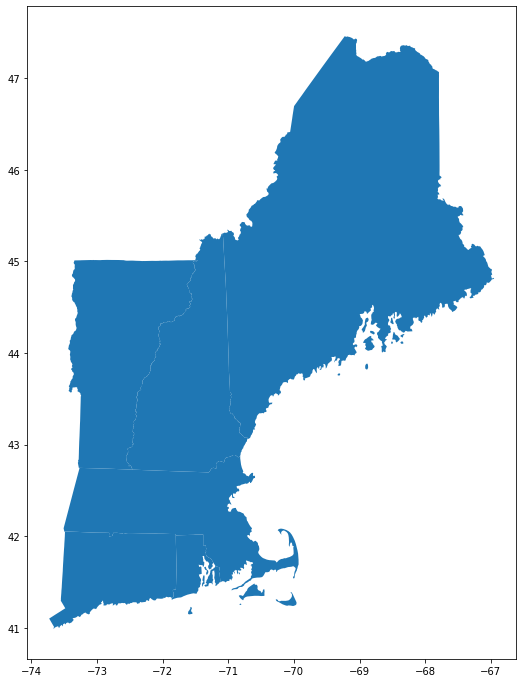

In [20]:
# Take a look at our handy work
ne.plot();

In [21]:
# Use unary_union to combine NE state polygons into single NE polygon

ne_poly = ne.geometry.unary_union

In [22]:
# Create new GeoDataFrame of points that intersect with the clipping polygon
# Dunkin Donuts in New England

ne_dd = dd[dd.geometry.intersects(ne_poly)]

ne_dd

,hashKey,geoJson,geohash,recordId,address,address2,adv_ord,almond,beverageonly,city,...,sun_catering_hours,distance,tender_agnostic_enabled,mobile_bypass_lane,pos_cmc_id,pos_type,last_updated_datetime,dbi_fee_hr_link,apply_online,geometry
5594,553310,"{'coordinates': [44.999292, -73.329912], 'type...",5533103460413357459,353209,320 US Route 2 N,Jolly's,Y,Y,N,Alburgh,...,,2551.902282,Y,,501307236,Radiant,1584423000000,https://www.vtdonuts.com/,Y,POINT (-73.32991 44.99929)
5970,553335,"{'coordinates': [44.536617, -73.247342], 'type...",5533357990135674191,350520,25 Macrae Rd,,Y,Y,N,Colchester,...,,2559.674420,Y,,501306277,Radiant,1584423000000,https://www.vtdonuts.com/,Y,POINT (-73.24734 44.53662)
6053,553337,"{'coordinates': [44.480493, -73.215511], 'type...",5533370268819983183,340015,80 Pearl St,,Y,Y,N,Burlington,...,06:00-19:00,2561.710378,Y,,501303469,Radiant,1584423000000,https://www.vtdonuts.com/,Y,POINT (-73.21551 44.48049)
6076,553337,"{'coordinates': [44.39629, -73.219413], 'type'...",5533371646478366723,355063,4109 Shelburne Rd,,Y,Y,N,Shelburne,...,,2562.250114,Y,,501307702,Radiant,1584423000000,https://www.vtdonuts.com/,Y,POINT (-73.21941 44.39629)
6078,553337,"{'coordinates': [44.459844, -73.207892], 'type...",5533371080454227149,300403,206 Shelburne Rd,,Y,Y,N,Burlington,...,06:00-19:00,2562.261165,Y,,501300221,Radiant,1584423000000,https://www.vtdonuts.com/,Y,POINT (-73.20789 44.45984)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9692,552561,"{'coordinates': [44.523921, -68.398848], 'type...",5525619745249323965,351144,15 Kingsland Crossing,,Y,Y,N,Ellsworth,...,,2795.889288,Y,N,501306536,Radiant,1584423000000,,N,POINT (-68.39885 44.52392)
9693,552561,"{'coordinates': [44.51592, -68.39666], 'type':...",5525615496302821401,346855,17 Myrick St,Wal-Mart,Y,Y,N,Lamoine,...,,2796.090065,Y,N,501305382,Radiant,1584423000000,,N,POINT (-68.39666 44.51592)
9694,552275,"{'coordinates': [46.141994, -67.840564], 'type...",5522751882830805181,336418,246 North St,,Y,Y,N,Houlton,...,,2805.016265,Y,,501302709,Radiant,1584423000000,,N,POINT (-67.84056 46.14199)
9695,552389,"{'coordinates': [44.721585, -67.44721], 'type'...",5523891348156326611,339701,300 East Main St,,Y,Y,N,Machias,...,,2839.584541,Y,N,501303392,Radiant,1584423000000,,N,POINT (-67.44721 44.72158)


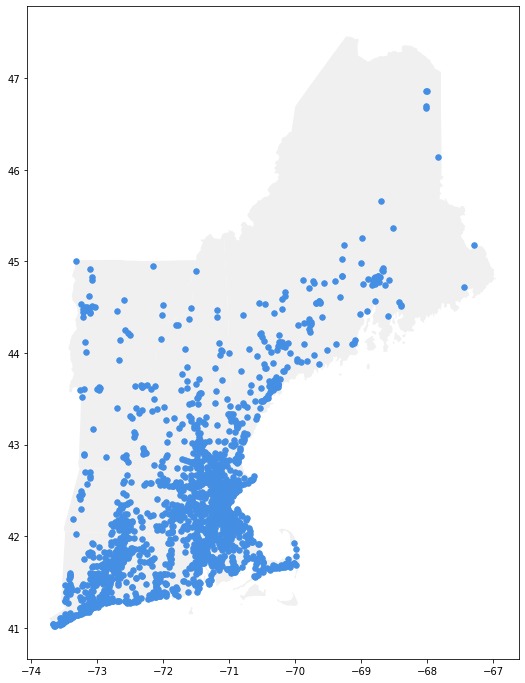

In [23]:
# Check out the DD's in NE!

fig, ax = plt.subplots()

base_color = '#f0f0f0'
marker_color = '#448ee4'

ne.plot(ax=ax, color=base_color, zorder=0);
ne_dd.plot(ax=ax, color=marker_color, markersize=30, zorder=1);

In [24]:
# Create a new GeoDataFrame by selecting the highways that intersect with the ne_poly

ne_hwys = highways[highways.geometry.intersects(ne_poly)]

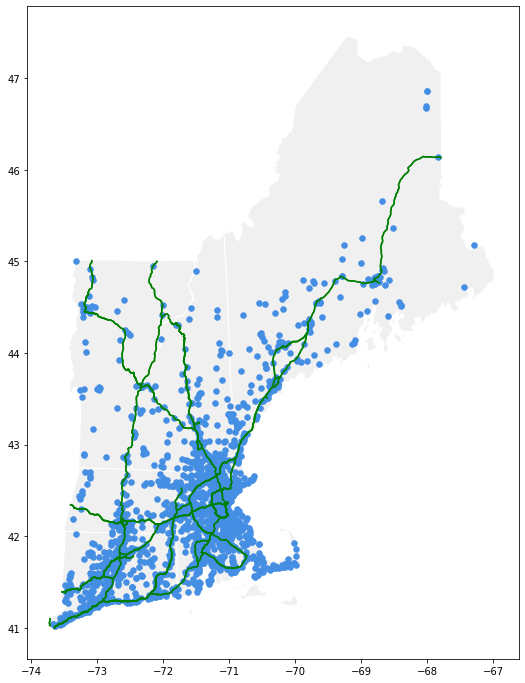

In [29]:
# See how DD locations correlate to highways in NE

fig, ax = plt.subplots()

base_color = '#f0f0f0'
marker_color = '#448ee4'
color_road = 'green'

ne.plot(ax=ax, color=base_color, edgecolor='white', zorder=0);
ne_hwys.plot(ax=ax, color=color_road, zorder=2);
ne_dd.plot(ax=ax, color=marker_color, markersize=30, zorder=1);

### Visualize Dunkin Donuts in New England

Let's create a map that will visualize quantities of Dunkin Donuts by state. The statePopCount dataset was created using the point in polygon tool within QGIS to create the 'Count' column which provides a count of Dunkin Donuts restaurants in each state. 

In [32]:
# Load dataset with population and count of DDs
statePopCount = gpd.read_file('../map/data/statePopCount.geojson') 
statePopCount

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,STATE,...,2012,2013,2014,2015,2016,2017,2018,2019,Count,geometry
0,31,01779792,0400000US31,31,NE,Nebraska,00,198956658395,1371829134,.Nebraska,...,1853303,1865279,1879321,1891277,1905616,1915947,1925614,1934408,19.0,"POLYGON ((-104.05351 41.15726, -104.05267 41.2..."
1,53,01779804,0400000US53,53,WA,Washington,00,172112588220,12559278850,.Washington,...,6897058,6963985,7054655,7163657,7294771,7423362,7523869,7614893,0.0,"MULTIPOLYGON (((-122.32834 48.02134, -122.3217..."
2,35,00897535,0400000US35,35,NM,New Mexico,00,314196306401,728776523,.New Mexico,...,2087309,2092273,2089568,2089291,2091630,2091784,2092741,2096829,16.0,"POLYGON ((-109.05017 31.48000, -109.04984 31.4..."
3,46,01785534,0400000US46,46,SD,South Dakota,00,196346981786,3382720225,.South Dakota,...,833566,842316,849129,853988,862996,872868,878698,884659,0.0,"POLYGON ((-104.05770 44.99743, -104.05021 44.9..."
4,48,01779801,0400000US48,48,TX,Texas,00,676653171537,19006305260,.Texas,...,26084481,26480266,26964333,27470056,27914410,28295273,28628666,28995881,175.0,"POLYGON ((-106.64548 31.89867, -106.64084 31.9..."
5,06,01779778,0400000US06,06,CA,California,00,403503931312,20463871877,.California,...,37948800,38260787,38596972,38918045,39167117,39358497,39461588,39512223,116.0,"MULTIPOLYGON (((-118.60337 33.47810, -118.5987..."
6,21,01779786,0400000US21,21,KY,Kentucky,00,102279490672,2375337755,.Kentucky,...,4386346,4404659,4414349,4425976,4438182,4452268,4461153,4467673,38.0,"MULTIPOLYGON (((-89.40565 36.52817, -89.39869 ..."
7,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,.Ohio,...,11548923,11576684,11602700,11617527,11634370,11659650,11676341,11689100,211.0,"MULTIPOLYGON (((-82.73571 41.60336, -82.71880 ..."
8,01,01779775,0400000US01,01,AL,Alabama,00,131174048583,4593327154,.Alabama,...,4815588,4830081,4841799,4852347,4863525,4874486,4887681,4903185,41.0,"MULTIPOLYGON (((-88.04374 30.51742, -88.03661 ..."
9,13,01705317,0400000US13,13,GA,Georgia,00,149482048342,4422936154,.Georgia,...,9901430,9972479,10067278,10178447,10301890,10410330,10511131,10617423,228.0,"POLYGON ((-85.60516 34.98468, -85.55259 34.984..."


In [33]:
# Convert 'Count' column from string to float
statePopCount['Count'] = statePopCount.Count.astype(float)

In [34]:
# Pull out New England from the statePopCount dataset
nePopCount = statePopCount[(statePopCount['STUSPS'] == 'CT') | (statePopCount['STUSPS'] == 'RI') | (statePopCount['STUSPS'] == 'MA') | (statePopCount['STUSPS'] == 'VT') | (statePopCount['STUSPS'] == 'NH') | (statePopCount['STUSPS'] == 'ME')]

nePopCount

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,STATE,...,2012,2013,2014,2015,2016,2017,2018,2019,Count,geometry
23,50,01779802,0400000US50,50,VT,Vermont,00,23874175944,1030416650,.Vermont,...,626090,626210,625214,625216,623657,624344,624358,623989,52.0,"POLYGON ((-73.43774 44.04501, -73.43199 44.063..."
30,44,01219835,0400000US44,44,RI,Rhode Island,00,2677779902,1323670487,.Rhode Island,...,1054621,1055081,1055936,1056065,1056770,1055673,1058287,1059361,175.0,"MULTIPOLYGON (((-71.36152 41.46483, -71.34707 ..."
37,25,00606926,0400000US25,25,MA,Massachusetts,00,20205125364,7129925486,.Massachusetts,...,6663005,6713315,6762596,6794228,6823608,6859789,6882635,6892503,1156.0,"MULTIPOLYGON (((-70.27553 41.31046, -70.26063 ..."
39,09,01779780,0400000US09,09,CT,Connecticut,00,12542497068,1815617571,.Connecticut,...,3594547,3594841,3594524,3587122,3578141,3573297,3571520,3565287,524.0,"POLYGON ((-73.72777 41.10070, -73.69595 41.115..."
43,23,01779787,0400000US23,23,ME,Maine,00,79887426037,11746549764,.Maine,...,1327729,1328009,1330513,1328262,1331317,1334612,1339057,1344212,161.0,"MULTIPOLYGON (((-68.37659 44.11376, -68.37538 ..."
44,33,01779794,0400000US33,33,NH,New Hampshire,00,23189413166,1026675248,.New Hampshire,...,1324232,1326622,1333341,1336350,1342307,1348787,1353465,1359711,220.0,"POLYGON ((-72.55725 42.85302, -72.55423 42.860..."


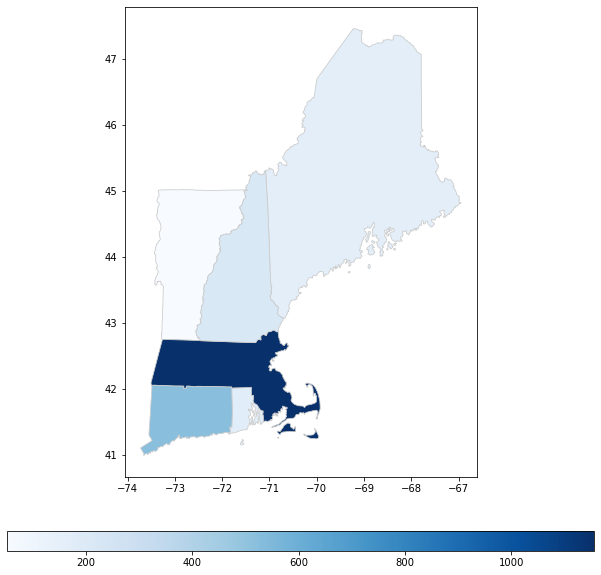

In [35]:
# Create choropleth map of Dunkin Donuts in New England

# set the value column that will be visualized
variable = 'Count'

# set the range for the choropleth values
vmin = min(nePopCount['Count'])
vmax = max(nePopCount['Count'])

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30,10))

# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm.set_array([])

# add the colorbar to the figure
fig.colorbar(sm, orientation="horizontal", fraction=0.036, pad=0.1, aspect = 30)

# create map
nePopCount.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8');

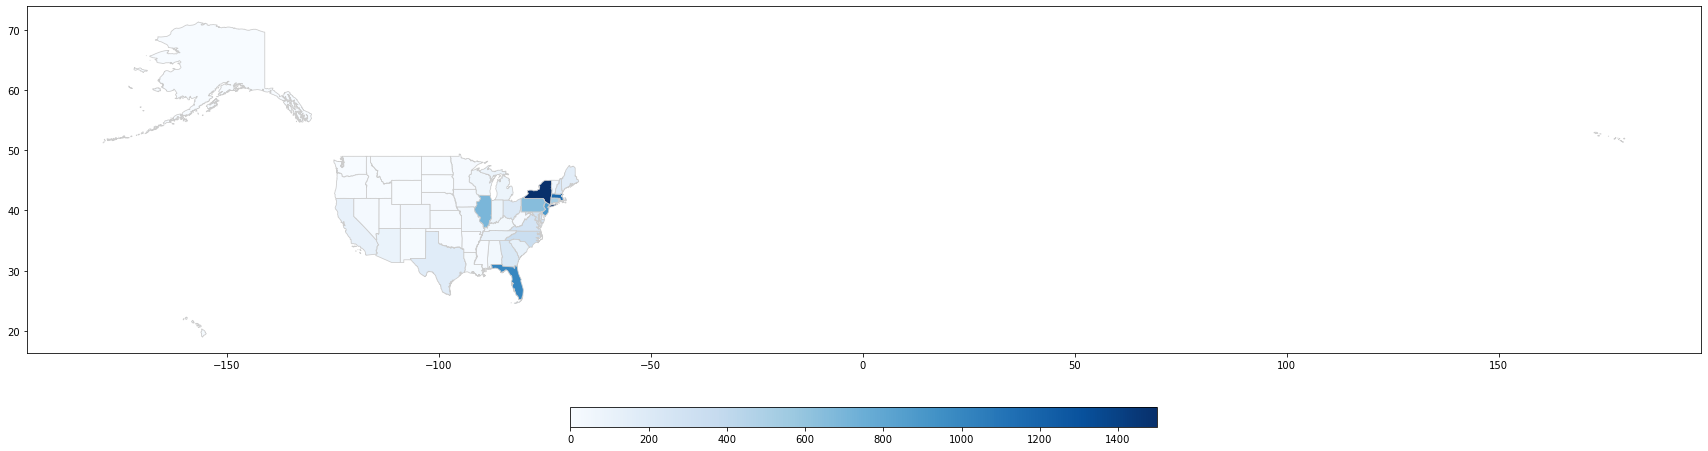

In [36]:
# Now let's see how New England compares to the rest of the country

# set the value column that will be visualized
variable = 'Count'

# set the range for the choropleth values
vmin = min(statePopCount['Count'])
vmax = max(statePopCount['Count'])

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30,10))

# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm.set_array([])

# add the colorbar to the figure
fig.colorbar(sm, orientation="horizontal", fraction=0.036, pad=0.1, aspect = 30)

# create map
statePopCount.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8');

## Cleaning Dunkin Donuts Data for Web Mapping

I'd like to now clean up the dataset to use for web mapping. This is where I'll drop unnecessary columns

In [41]:
dd.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 9698 entries, 0 to 9697
Data columns (total 69 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   hashKey                  9698 non-null   int64   
 1   geoJson                  9698 non-null   object  
 2   geohash                  9698 non-null   int64   
 3   recordId                 9698 non-null   object  
 4   address                  9698 non-null   object  
 5   address2                 9698 non-null   object  
 6   adv_ord                  9698 non-null   object  
 7   almond                   9698 non-null   object  
 8   beverageonly             9698 non-null   object  
 9   city                     9698 non-null   object  
 10  close_reason_cd          9698 non-null   object  
 11  co_brander_cd            9698 non-null   object  
 12  combostore               9698 non-null   object  
 13  country                  9698 non-null   object  
 14  

In [42]:
# drop unwanted columns

dd.drop(['address2', 'adv_ord', 'almond', 'beverageonly', 'close_reason_cd', 'co_brander_cd', 'combostore', 'dma_cd', 'dunkincardenabled', 'faxnumber', 'k_cup', 'kosher', 'loyalty', 'mobile', 'operation_status_cd', 'sitetype', 'turbooven', 'website', 'wireless', 'curbside', 'mon_cs_hours', 'tue_cs_hours', 'wed_cs_hours', 'thu_cs_hours', 'fri_cs_hours', 'sat_cs_hours', 'sun_cs_hours', 'next_gen_store', 'dt_auto_fire', 'catering_flag', 'mon_catering_hours', 'tue_catering_hours', 'wed_catering_hours', 'thu_catering_hours', 'fri_catering_hours', 'sat_catering_hours', 'sun_catering_hours', 'distance', 'tender_agnostic_enabled', 'mobile_bypass_lane', 'pos_cmc_id', 'pos_type', 'last_updated_datetime', 'dbi_fee_hr_link', 'apply_online'], axis=1, inplace=True)


In [43]:
dd.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 9698 entries, 0 to 9697
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   hashKey      9698 non-null   int64   
 1   geoJson      9698 non-null   object  
 2   geohash      9698 non-null   int64   
 3   recordId     9698 non-null   object  
 4   address      9698 non-null   object  
 5   city         9698 non-null   object  
 6   country      9698 non-null   object  
 7   county       9698 non-null   object  
 8   drivein      9698 non-null   object  
 9   fri_hours    9698 non-null   object  
 10  lat          9698 non-null   object  
 11  lc           9698 non-null   object  
 12  lng          9698 non-null   object  
 13  mon_hours    9698 non-null   object  
 14  name         9698 non-null   object  
 15  phonenumber  9698 non-null   object  
 16  postal       9698 non-null   object  
 17  sat_hours    9698 non-null   object  
 18  state        9698 no

In [46]:
# Create GeoJSON of cleaned Dunkin Donuts data

dd.to_file('../map/data/dunkinClean.geojson', driver="GeoJSON")

## Reprojection

I reproject the New England datasets to an Azimuthal Equidistant projection to show accurate spatial relations between Dunkin Donut locations.

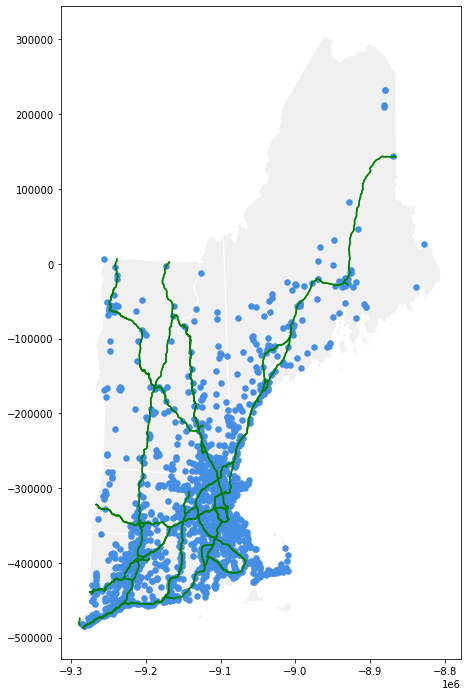

In [37]:
# Reproject datasets to Equidistant projection
# modified Proj4 projection string
# World Azimuthal Equidistant

proj_params = '+proj=ob_tran +o_proj=moll +o_lat_p=45 +o_lon_p=-90 +lon_0=-70' # ' +proj=aeqd +lat_0=0 +lon_0=0 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m no_defs'

fig, ax = plt.subplots()

ne_projected = ne.to_crs(proj_params)
ne_hwys_projected = ne_hwys.to_crs(proj_params)
ne_dd_projected = ne_dd.to_crs(proj_params)

ne_projected.plot(ax=ax, color=base_color, edgecolor='white', zorder=0);
ne_hwys_projected.plot(ax=ax, color=color_road, zorder=2);
ne_dd_projected.plot(ax=ax, color=marker_color, markersize=30, zorder=1);